## 1.. How to read data using sqlite3

In [ ]:
"
Database : Optimal or oraganised way to store data so that u can access, manage, and update data as per need !

Entire db is divided into 2 categories :

a) relational db 
b) non -relational db 


In relational db , the data is stored in tables, where each table has rows and columns (like a spreadsheet or a csv data)

In non relational db , Data is stored in documents(MongoDB) or in key-value pairs(Redis, DynamoDB) or in nodes and edges(Graph Databases like Neo4j)


sqlite is a relational db ( ie we have data in the form of tables )..

You can think of SQLite db as a file that holds multiple tables (similar to spreadsheets or as csv), 
and you can perform actions like adding, updating, or retrieving data using a language called SQL (Structured Query Language).
It's widely used in mobile apps, small web applications, and for local data storage because it's fast, simple, and doesn’t require much setup.

"

In [1]:
# install.packages("DBI")
# install.packages("RSQLite")

In [2]:
library(DBI)
library(RSQLite)

In [3]:
help(dbConnect)

## Create a connection to a DBMS

dbConnect {DBI},R Documentation
drv,"an object that inherits from DBIDriver, or an existing DBIConnection object (in order to clone an existing connection)."
...,"authentication arguments needed by the DBMS instance; these typically include user, password, host, port, dbname, etc. For details see the appropriate DBIDriver."


In [4]:
args(dbConnect)

function (drv, ...) 
NULL

In [ ]:
"

drv: This is the database driver object. It represents the interface to a specific database management system (DBMS)
     Various DBMS-specific drivers are RSQLite::SQLite() , RMySQL::MySQL() and RPostgreSQL::PostgreSQL()..

    As I want connection with SQLite database , hence we have to use SQLite() driver which belongs to RSQLite package..
    

"

In [ ]:
# very first u have to create a connection to our SQLite database

In [5]:
# Define the path to the SQLite database file
# use forward slashes (/) or double backslashes (\) as the directory separator in the file path, as 
# R may not recognize backslashes as path separators on some systems..

db_file = "R:/All_Datasets/2.. Zomato/Datasets/zomato_rawdata.sqlite"

conn = dbConnect(SQLite() , db_file)

In [6]:
class(conn)

# Now 'con' is the SQLite database connection object

[1] "SQLiteConnection"
attr(,"package")
[1] "RSQLite"

In [ ]:
"

dbConnect function to connect to the SQLite database, specifying SQLite() as the driver 
and providing the database file name using the dbname parameter. 


"

In [7]:
dbListTables(conn) ## return table-name from "con" object from which we have to fetch data ..

[1] "Users"

In [8]:
args(dbReadTable)

function (conn, name, ...) 
NULL

In [9]:
# Get dataframe..

df = dbReadTable(conn , 'Users')

In [10]:
dim(df)

[1] 51717    18

## 2.. how to deal with missing values ? 

    its not good to drop missing value right now as we might loose important info , so 
    we will deal with it depending upon the problem statements ..

    is: This is a prefix commonly used in R for functions that perform logical tests or checks. 
        It's not a class , ie it is an indication that the function is checking a condition..

    na(): This is the function that checks for missing values (NA) in R. 
          It returns a logical vector indicating whether each element in a vector or data frame is missing or not.

In [12]:
help(is.na)

## The generic function is.na indicates which elements are missing in vectors and data frames in R

## is.na(x)
## anyNA(x, recursive = FALSE)

NA {base},R Documentation
x,"an R object to be tested: the default method for is.na and anyNA handle atomic vectors, lists, pairlists, and NULL."
recursive,logical: should anyNA be applied recursively to lists and pairlists?
value,a suitable index vector for use with x.


In [11]:
args(is.na)

function (x) 
NULL

In [13]:
is.na(df)  ## returns logical dataframe ie (True/False)

index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost.for.two.people.,reviews_list,menu_item,listed_in.type.,listed_in.city.
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [15]:
help(colSums)

## Form row and column sums for numeric arrays (or data frames)..

colSums {base},R Documentation
x,"an array of two or more dimensions, containing numeric, complex, integer or logical values, or a numeric data frame. For .colSums() etc, a numeric, integer or logical matrix (or vector of length m * n)."
na.rm,logical. Should missing values (including NaN) be omitted from the calculations?
dims,"integer: Which dimensions are regarded as ‘rows’ or ‘columns’ to sum over. For row*, the sum or mean is over dimensions dims+1, ...; for col* it is over dimensions 1:dims."
"m, n",the dimensions of the matrix x for .colSums() etc.


In [14]:
args(colSums)

function (x, na.rm = FALSE, dims = 1L) 
NULL

In [16]:
## lets find out total missing values in every col of your dataframe 

colSums(is.na(df))

index                         url 
                          0                           0 
                    address                        name 
                          0                           0 
               online_order                  book_table 
                          0                           0 
                       rate                       votes 
                       7775                           0 
                      phone                    location 
                       1208                          21 
                  rest_type                  dish_liked 
                        227                       28078 
                   cuisines approx_cost.for.two.people. 
                         45                         346 
               reviews_list                   menu_item 
                          0                           0 
            listed_in.type.             listed_in.city. 
                          0                           0

In [ ]:
"
     -->> As we notice around 50 % of data will be lost if we delete the missing values in "dish_liked" column
         ie , We will keep that column for now..
        
     -->> let's check for rate column as it contains 15% of its points as null value which 
         is one of the most important feature..
         
"

In [18]:
unique(df$rate)

[1] "4.1/5"  "3.8/5"  "3.7/5"  "3.6/5"  "4.6/5"  "4.0/5"  "4.2/5"  "3.9/5" 
 [9] "3.1/5"  "3.0/5"  "3.2/5"  "3.3/5"  "2.8/5"  "4.4/5"  "4.3/5"  "NEW"   
[17] "2.9/5"  "3.5/5"  NA       "2.6/5"  "3.8 /5" "3.4/5"  "4.5/5"  "2.5/5" 
[25] "2.7/5"  "4.7/5"  "2.4/5"  "2.2/5"  "2.3/5"  "3.4 /5" "-"      "3.6 /5"
[33] "4.8/5"  "3.9 /5" "4.2 /5" "4.0 /5" "4.1 /5" "3.7 /5" "3.1 /5" "2.9 /5"
[41] "3.3 /5" "2.8 /5" "3.5 /5" "2.7 /5" "2.5 /5" "3.2 /5" "2.6 /5" "4.5 /5"
[49] "4.3 /5" "4.4 /5" "4.9/5"  "2.1/5"  "2.0/5"  "1.8/5"  "4.6 /5" "4.9 /5"
[57] "3.0 /5" "4.8 /5" "2.3 /5" "4.7 /5" "2.4 /5" "2.1 /5" "2.2 /5" "2.0 /5"
[65] "1.8 /5"

    -->> 1... So, Now we found this column has 'NEW' ,"-" values which should replaced by zero or missing value(NA) 
            after having conversation with my business team ( Domain Expertise)..

    -->> 2...there are values as '3.8/5' instead of 3.8 , ie we have to fix this .. 

#### so lets replace 'NEW' & '-' with missing value(NA) ,so that we can fill later NA with some value as per need..

In [20]:
help(ifelse)

ifelse {base},R Documentation
test,an object which can be coerced to logical mode.
yes,return values for true elements of test.
no,return values for false elements of test.


In [19]:
args(ifelse)

function (test, yes, no) 
NULL

In [23]:
df$rate = ifelse(df$rate == "NEW" , NA , df$rate)
df$rate = ifelse(df$rate == "-" , NA , df$rate)

In [24]:
unique(df$rate)

[1] "4.1/5"  "3.8/5"  "3.7/5"  "3.6/5"  "4.6/5"  "4.0/5"  "4.2/5"  "3.9/5" 
 [9] "3.1/5"  "3.0/5"  "3.2/5"  "3.3/5"  "2.8/5"  "4.4/5"  "4.3/5"  NA      
[17] "2.9/5"  "3.5/5"  "2.6/5"  "3.8 /5" "3.4/5"  "4.5/5"  "2.5/5"  "2.7/5" 
[25] "4.7/5"  "2.4/5"  "2.2/5"  "2.3/5"  "3.4 /5" "3.6 /5" "4.8/5"  "3.9 /5"
[33] "4.2 /5" "4.0 /5" "4.1 /5" "3.7 /5" "3.1 /5" "2.9 /5" "3.3 /5" "2.8 /5"
[41] "3.5 /5" "2.7 /5" "2.5 /5" "3.2 /5" "2.6 /5" "4.5 /5" "4.3 /5" "4.4 /5"
[49] "4.9/5"  "2.1/5"  "2.0/5"  "1.8/5"  "4.6 /5" "4.9 /5" "3.0 /5" "4.8 /5"
[57] "2.3 /5" "4.7 /5" "2.4 /5" "2.1 /5" "2.2 /5" "2.0 /5" "1.8 /5"

In [ ]:
help(strsplit)

## Split the Elements of a Character Vector

In [25]:
args(strsplit)

function (x, split, fixed = FALSE, perl = FALSE, useBytes = FALSE) 
NULL

In [26]:
strsplit('4.1/5' , split = "/")

## strsplit() is a base-R function
#### it returns a list , as key is 1 & for 1 key , we have values as '4.1' , '5'

[[1]]
[1] "4.1" "5"

In [27]:
class(strsplit('4.1/5' , split = "/"))

[1] "list"

In [28]:
unlist(strsplit('4.1/5' , split = "/")) ## ie just unlist it , ie we will end up getting character vector 

[1] "4.1" "5"

In [29]:
unlist(strsplit('4.1/5' , split = "/"))[1]

[1] "4.1"

In [30]:
as.numeric(unlist(strsplit('4.1/5' , split = "/"))[1])

[1] 4.1

In [31]:
class('4.1/5')

[1] "character"

In [32]:
class(NA)

[1] "logical"

In [33]:
### if rating belongs to character , then do operation defined in if block else return as it is !


fetch_rating = function(x)
{
    if (class(x) == 'character')
    {
        rating = as.numeric(unlist(strsplit(x , split = "/"))[1])
        return (rating)
    }

    else
    {
        return (x)
    }
}

In [34]:
args(apply)

## Syntax : apply(X, MARGIN, FUN)

## If the margin is 1 ,  function is applied across row, 
## if the margin is 2 ,  function is applied across the column 

function (X, MARGIN, FUN, ..., simplify = TRUE) 
NULL

In [ ]:
## I/p : This function takes array, matrix or dataframe as an argument along with function 
## O/p : It returns the result in the form of a vector,matrix or array or list of values

    apply() is used when we want to apply a function to the rows or columns of a data frame.. 
    It cannot be applied on lists or vectors..

In [36]:
df$rate = apply(df['rate'] , 1 , fetch_rating)

In [37]:
df$rate

[1] 4.1 4.1 3.8 3.7 3.8 3.8 3.6 4.6 4.0 4.2 4.1 4.2 4.2 4.0 3.8 3.8 3.9 3.8
   [19] 3.9 3.1 3.0 3.7 3.6 3.6 3.7 3.2 3.8 3.3 3.3 3.8 4.0 2.8 3.9 3.9 4.2 3.9
   [37] 2.8 4.2 4.4 4.0 3.8 3.9 3.9 3.9 4.6 3.8 3.6 4.0 3.7 3.1 3.7 4.1 4.3 4.0
   [55] 4.0 3.9 3.8 4.2 3.6 3.7 4.2 3.6 3.8 4.0 3.7 4.1 3.6 4.1 3.8 3.2 3.6 4.1
   [73]  NA 2.9 3.6  NA 4.1 3.6 3.7 3.8 3.8 4.2 3.5 3.8  NA 4.0 4.4 3.5 3.5 3.7
   [91]  NA  NA  NA 3.2 2.6 3.3 3.8 3.7 3.7 3.8 3.5 3.7 3.5 3.8 3.2 3.5 3.4  NA
  [109] 3.2 3.2  NA 3.1 3.4  NA  NA  NA  NA  NA  NA 3.1 4.1 3.3 3.1 3.3 2.9  NA
  [127]  NA 3.3  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
  [145]  NA 4.0 3.0 3.9 4.1 3.8 3.8 3.8 4.1 3.8  NA 4.1 3.7 3.9 3.0 3.7 3.3 3.3
  [163] 3.6 3.3 4.6 4.1 4.1 3.7 3.2 4.0 3.7 3.5 3.8 3.8 4.2 3.6 3.0 4.1 3.8 3.1
  [181] 3.9 4.5 4.1 3.6 3.5 3.9 3.9 3.9 4.3 3.8 3.9 4.2 3.6 4.1 3.8 3.3 3.9 3.4
  [199] 3.9 3.0 3.8 3.8 3.6 4.1 4.2 3.5 2.5 4.1 4.1 3.9 3.6 3.6 4.2 3.2 3.1 3.1
  [217]  NA 4.3 3.9 4.3 3.8 3.9 3.0 3.6 2.8 3.6 4.4 3.8 3.8 3.6 3.8 3.9  NA  NA
  [235] 3.6 3.7 3.6 3.8 3.4 3.6 3.3 3.5  NA  NA  NA 3.4  NA 3.7 2.9 3.7 3.5 3.7
  [253] 2.9 4.1 3.2 3.8 3.8 3.8 3.8 3.8 3.5 3.7 4.0 3.6 3.9 2.5 3.4 3.2 3.6 3.9
  [271] 3.8 4.1 3.2 3.6 3.7 3.9  NA 3.9 4.1 3.8 3.1 3.7 4.2 4.0 4.3 3.7 3.1 3.9
  [289] 3.3  NA 4.3 2.6 3.9 3.7 4.2 3.9 3.8 4.2 3.9 4.1 3.6 3.6 3.6 4.0 3.7 4.1
  [307]  NA 4.0 2.6 3.4 3.9 2.8 3.9 3.8 4.0 4.2 4.0 3.5 3.0 3.7 3.6 3.1 3.9 3.9
  [325] 3.6 3.4 3.8 3.6 3.8 3.5 3.8 3.2 3.7 3.8 4.1 4.1 3.8 3.4 3.7 4.0 3.1 3.5
  [343] 3.8 3.7 3.0 3.8 3.7 3.6 3.2 3.7 3.4 3.6 3.6 3.0 3.7 3.5 3.6 4.1 3.5 3.7
  [361] 3.7 3.8 2.7 3.6 3.2 3.8 3.7  NA 3.6 3.1 3.0 3.4 3.0 2.9 3.9 4.1 3.5 3.4
  [379] 3.6 3.5 3.8 3.8 3.7 3.8 3.7 3.3 3.4 3.5 3.3 3.4 3.8 3.7 2.9 3.4 3.6 4.0
  [397] 3.9 4.1 3.7 3.9 3.9 4.0 3.6 3.7 4.0 3.2 3.5 4.0 3.9 3.5 3.5 3.8 3.7 3.8
  [415] 4.1 4.1 3.7 3.0 3.2 3.8 4.0 3.7 3.1 3.0 3.7 3.7  NA 3.3 3.3 3.8 3.4 3.5
  [433]  NA 3.5 3.2 3.1  NA 3.6  NA  NA 3.3 3.4  NA 3.9 3.7 2.8 3.3 3.5 3.4  NA
  [451] 3.6  NA  NA 3.3 3.4  NA 4.1 4.2  NA  NA 4.2 4.0 3.9  NA 3.5 4.2 3.4 4.2
  [469] 3.3 3.8 3.7 4.1  NA 3.9 3.8 4.0 4.1 3.3 3.6 3.4 4.3 3.8 4.2 4.0 4.1  NA
  [487] 3.8 3.9 3.1 3.9 4.2  NA 3.2 3.8 4.3 4.4 3.7 3.9 3.7 3.8 4.0 3.8 3.9 3.8
  [505] 3.7 3.9 3.8 3.8 4.3 3.5 4.0 3.2 3.7 3.5 3.2 3.6 3.8 3.6 3.8 3.2 3.5 3.4
  [523] 3.4  NA  NA 2.9  NA 3.2  NA  NA  NA  NA 3.9 3.9  NA 4.0 3.7 4.0 4.0 3.6
  [541] 3.6 3.8 3.6  NA 3.3 3.3 4.0 2.7  NA 3.7 3.5  NA 3.6  NA 3.9 4.0 4.2 4.6
  [559] 4.2 4.1 4.2 3.8 4.1 4.0 4.1 4.2 4.1 4.2 4.2 4.2 4.0 4.2 4.0 4.0 3.9  NA
  [577] 3.9 3.8 3.8 3.9 3.6 3.7 3.7 3.9 3.8 3.9 3.8 2.5 3.1 3.7 3.0 3.8 3.5 3.8
  [595] 3.1 3.6  NA 3.3  NA 3.6  NA 2.6 3.6 3.4 3.7 3.8 3.5 3.8 3.4 3.1 3.5 3.6
  [613] 3.7  NA 3.2 3.0 3.5 3.5 2.7  NA 2.8 3.2 3.4  NA 3.3  NA  NA  NA  NA 3.5
  [631] 3.7 3.9 4.7  NA 4.3 3.7 4.0 3.8 3.6 3.9 3.8  NA 3.9 4.4 3.6 3.4 3.8 3.8
  [649] 3.6 3.8 3.8 3.5 3.8 3.8 3.7 3.3 4.1 2.8 4.1  NA 3.8 3.7 3.6 3.7 3.8 4.2
  [667] 3.9 3.5 3.4 3.6 3.4 3.9 3.8 3.7 3.6 3.7 3.8 3.9 3.6 3.6  NA 3.5 3.4 3.5
  [685] 3.8 3.0 3.5  NA 4.0  NA 3.0 3.4 3.5 3.5 4.2 3.3 4.1 3.8 3.7 3.4 3.3 3.5
  [703] 2.7 3.0 3.7 3.7 2.8 3.3 3.5 3.9 3.4 3.5 3.4 3.4  NA 3.2 3.6 3.1  NA  NA
  [721]  NA  NA  NA  NA 3.8 3.1 3.2 3.3 3.2 3.1 3.3 3.0 3.1 3.3  NA  NA  NA  NA
  [739]  NA 3.7 3.6 3.0  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA  NA
  [757]  NA 3.4 3.4  NA 3.6 4.0  NA 3.0 2.9 3.8 4.2 3.9 3.8 4.4 3.9 3.8 4.1 3.8
  [775] 3.8 3.9 4.1 3.8 3.8 2.7 3.9 3.3 3.9 4.2 3.9 4.0 4.2 3.4 3.7 3.8 3.9 3.7
  [793] 3.9 4.1 3.8 3.9 3.5 4.1 3.7 3.8 4.3 4.2 4.1 3.7 4.0 3.6 3.8 3.9 3.6 3.4
  [811]  NA 3.9 4.0 3.7 2.9 3.3 3.6 3.9 3.8 3.8 4.0 3.6 3.8 3.6 3.3 3.2 3.6 3.8
  [829] 3.7  NA 3.8  NA  NA 3.7 3.7 3.3 3.2  NA 3.9 3.7 3.2  NA 3.6  NA 3.2  NA
  [847]  NA  NA  NA  NA  NA 3.2 3.6  NA  NA 3.8 4.1 3.7 3.3 3.1  NA 3.0 2.7 4.4
  [865] 4.2 4.3 3.3 3.1 4.7 4.3 4.1 4.1 3.9 3.8 4.0  NA 4.0 3.3 2.7 3.0 3.8 4.0
  [883] 3.9  NA 3.7 3.7 3.9 3.9 3.9 3.6 3.8 3.9 3.6 3.9 3.6 2.7 3.6  NA 3.3 3.7
  [9

## 3.. Is there a relation between online order option and rating of the restaurant ?

In [ ]:
### lets find out relation b/w rating & online_order
### ie how many restaurants that have rating 0 ,1 ,1.2 ,1.4 ,1.6--- & that accepts online_order & do not accept order
### for such problem statement , its a good idea to create frequency tables..

In [39]:
sum(is.na(df$rate))

[1] 10052

In [ ]:
help(table)

## belongs to base package 
## Cross Tabulation and Table Creation 

In [40]:
args(table)

function (..., exclude = if (useNA == "no") c(NA, NaN), useNA = c("no", 
    "ifany", "always"), dnn = list.names(...), deparse.level = 1) 
NULL

In [41]:
names(df)

[1] "index"                       "url"                        
 [3] "address"                     "name"                       
 [5] "online_order"                "book_table"                 
 [7] "rate"                        "votes"                      
 [9] "phone"                       "location"                   
[11] "rest_type"                   "dish_liked"                 
[13] "cuisines"                    "approx_cost.for.two.people."
[15] "reviews_list"                "menu_item"                  
[17] "listed_in.type."             "listed_in.city."

In [43]:
# Create a contingency table

x = table(df$rate , df$online_order)

In [44]:
class(x)

[1] "table"

In [ ]:
"
Tip :
Use as.data.frame.matrix() when your input is a matrix and you want to maintain the matrix structure.
Use as.data.frame() when your input is a list, a data frame-like object or a matrix without specific row or column names.

"

In [46]:
x_df = as.data.frame.matrix(x)

In [47]:
x_df

,No,Yes
,<int>,<int>
1.8,5,0
2,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


In [48]:
args(barplot)

function (height, ...) 
NULL

In [ ]:
"
barplot(height, width = 1, space = NULL, names.arg = NULL,
        legend.text = NULL, beside = FALSE, horiz = FALSE,
        density = NULL, angle = 45, col = NULL, border = par("fg"),
        main = NULL, sub = NULL, xlab = NULL, ylab = NULL,
        xlim = NULL, ylim = NULL, xpd = TRUE, log = "",
        axes = TRUE, axisnames = TRUE, cex.axis = par("cex.axis"),
        cex.names = par("cex.axis"), inside = TRUE, plot = TRUE,
        axis.lty = 1, offset = 0, add = FALSE, ann = par("ann"),
        args.legend = NULL)



height: This parameter determine the height of each bar in the barplot

names.arg : A vector of names to be plotted below each bar..

"

In [51]:
t(x_df)

## The t(df) transposes the data frame

,1.8,2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,⋯,4,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9
No,5,11,9,10,29,36,38,83,141,224,⋯,874,843,648,692,374,297,140,113,34,12
Yes,0,0,15,16,22,34,63,177,166,376,⋯,2309,2105,1536,1001,773,359,160,54,32,43


In [60]:
colnames(t(x_df))

[1] "1.8" "2"   "2.1" "2.2" "2.3" "2.4" "2.5" "2.6" "2.7" "2.8" "2.9" "3"  
[13] "3.1" "3.2" "3.3" "3.4" "3.5" "3.6" "3.7" "3.8" "3.9" "4"   "4.1" "4.2"
[25] "4.3" "4.4" "4.5" "4.6" "4.7" "4.8" "4.9"

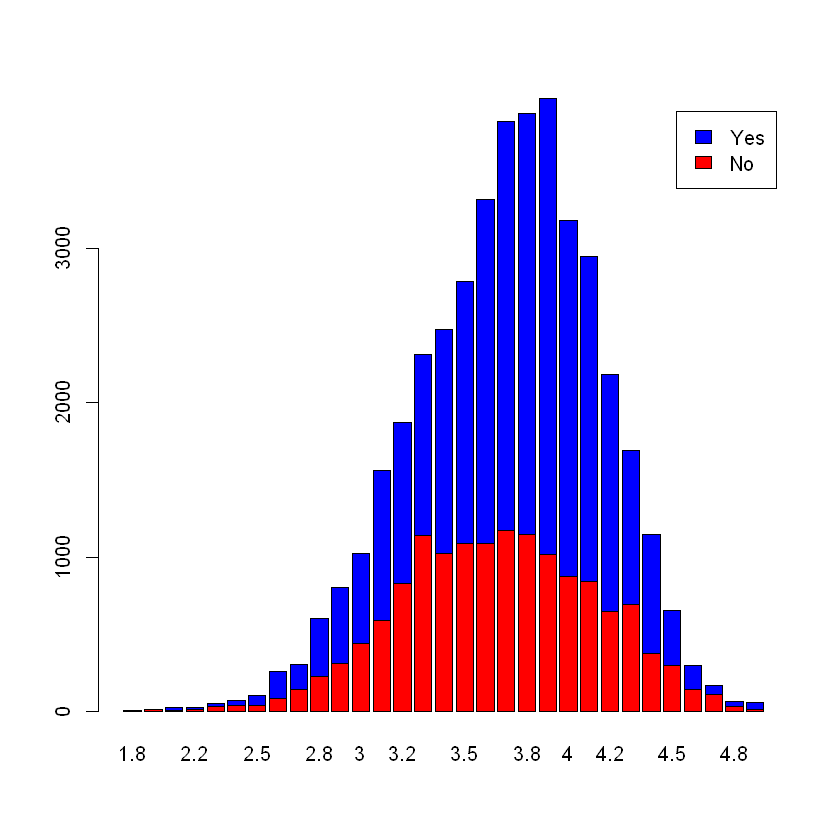

In [63]:
barplot(height = t(x_df) , names.arg = colnames(t(x_df)) , col = c("red" , "blue") , legend.text = TRUE)

In [ ]:
"

This gives us some insights that these are couple of ratings for which we have interesting stats !
Now lets make this chart or lets make this insight much more clear !

So instead of focusing on count here(bar chart scale) , can we obtain proportions(in normalized barplot) ?

if u want to analyze proportions within each category in region , then 100% stacked bar-chart is useful !

"

In [ ]:
### lets make it as 100% stacked bar chart , so first Normalize the table by rows !

In [65]:
help(prop.table)

## Syntax :: prop.table(x, margin = NULL)
## x receives data in the form of table or array , 

proportions {base},R Documentation
x,"an array, usually a table."
margin,"a vector giving the margins to split by. E.g., for a matrix 1 indicates rows, 2 indicates columns, c(1, 2) indicates rows and columns. When x has named dimnames, it can be a character vector selecting dimension names."


In [64]:
args(prop.table)

## Syntax :: prop.table(x, margin = NULL)
## x receives data in the form of table or array , 

function (x, margin = NULL) 
NULL

In [68]:
normalize_x_df = prop.table(as.matrix(x_df) , margin = 1) * 100

In [69]:
normalize_x_df 

,No,Yes
1.8,100.00000,0.00000
2,100.00000,0.00000
2.1,37.50000,62.50000
2.2,38.46154,61.53846
2.3,56.86275,43.13725
2.4,51.42857,48.57143
2.5,37.62376,62.37624
2.6,31.92308,68.07692
2.7,45.92834,54.07166
2.8,37.33333,62.66667


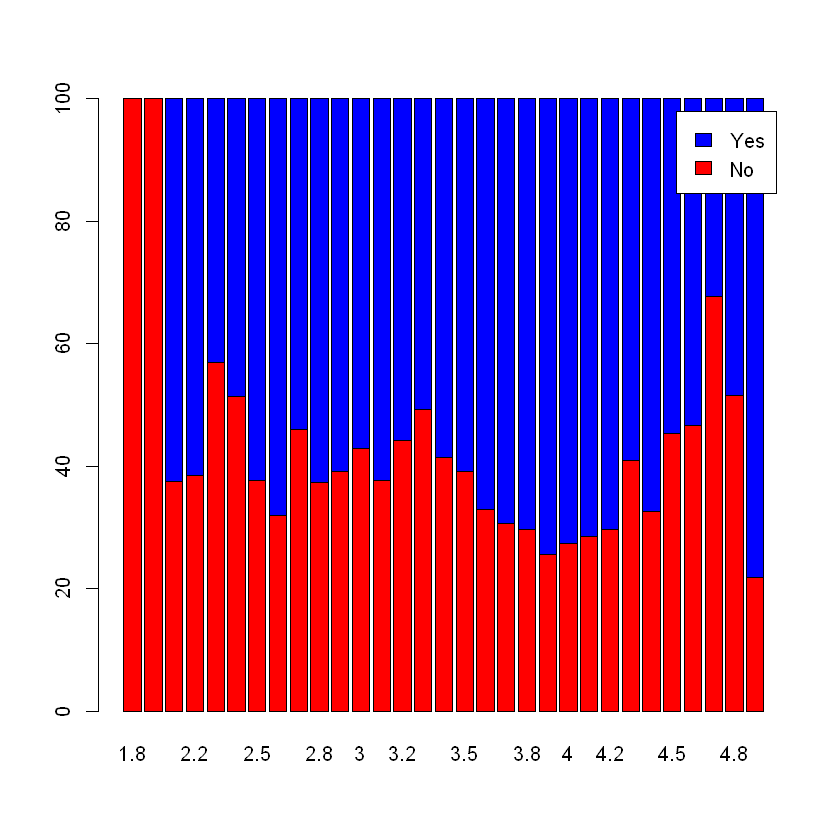

In [72]:
# Create a stacked bar plot

barplot(height = t(normalize_x_df) , names.arg = colnames(t(normalize_x_df)) , col = c("red" , "blue") , legend.text = TRUE)

In [ ]:
"
In order to be a highly rated restaurant , its a good thing to accept online Order at Zomato !
Look in 4.0 - 4.6 , most of the restaurants do accept online order !

"

## 4.. Data Cleaning to perform Text Analysis 
    Perform Text Analysis.. ie analysing customer reviews of Quick Bites restaurant : 

## ways to do it..

    a) using wordcloud
    
        But wordcloud will not give a clear cut , how important words are
        So lets use a concept of frequency over here...
        
    b) using plots/charts-- where each word have some frequency..

### b) using plots/charts
    We need Pre-processed data so that we can plot charts
    ie  (Biryani , 10K)
        (Chicken , 15K)
        etc..
        
        How to Perform Data Pre-processing to pre-process this data..
        Steps-->>
            a) Perform Lower-case operation
            b) Do tokenization
            c) Removal of stopwords from data
            d) Store your entire data in the character vector so that we can compute frequency of each word
            e) Do plotting , using Unigram  , bigram & Trigram analysis..

In [ ]:
### ie first we need whole data of 'Quick Bites' , but first & foremost lets make this feature 'rest_type' clean , ie 
## remove missing values in this feature if available ..

In [85]:
dim(df)

[1] 51717    18

In [86]:
names(df)

[1] "index"                       "url"                        
 [3] "address"                     "name"                       
 [5] "online_order"                "book_table"                 
 [7] "rate"                        "votes"                      
 [9] "phone"                       "location"                   
[11] "rest_type"                   "dish_liked"                 
[13] "cuisines"                    "approx_cost.for.two.people."
[15] "reviews_list"                "menu_item"                  
[17] "listed_in.type."             "listed_in.city."

In [88]:
unique(df$rest_type)

[1] "Casual Dining"                 "Cafe, Casual Dining"          
 [3] "Quick Bites"                   "Casual Dining, Cafe"          
 [5] "Cafe"                          "Quick Bites, Cafe"            
 [7] "Cafe, Quick Bites"             "Delivery"                     
 [9] "Mess"                          "Dessert Parlor"               
[11] "Bakery, Dessert Parlor"        "Pub"                          
[13] "Bakery"                        "Takeaway, Delivery"           
[15] "Fine Dining"                   "Beverage Shop"                
[17] "Sweet Shop"                    "Bar"                          
[19] "Beverage Shop, Quick Bites"    "Confectionery"                
[21] "Quick Bites, Beverage Shop"    "Dessert Parlor, Sweet Shop"   
[23] "Bakery, Quick Bites"           "Sweet Shop, Quick Bites"      
[25] "Kiosk"                         "Food Truck"                   
[27] "Quick Bites, Dessert Parlor"   "Beverage Shop, Dessert Parlor"
[29] "Takeaway"                      "Pub, Casual Dining"           
[31] "Casual Dining, Bar"            "Dessert Parlor, Beverage Shop"
[33] "Quick Bites, Bakery"           "Dessert Parlor, Quick Bites"  
[35] "Microbrewery, Casual Dining"   "Lounge"                       
[37] "Bar, Casual Dining"            "Food Court"                   
[39] "Cafe, Bakery"                  NA                             
[41] "Dhaba"                         "Quick Bites, Sweet Shop"      
[43] "Microbrewery"                  "Food Court, Quick Bites"      
[45] "Pub, Bar"                      "Casual Dining, Pub"           
[47] "Lounge, Bar"                   "Food Court, Dessert Parlor"   
[49] "Casual Dining, Sweet Shop"     "Food Court, Casual Dining"    
[51] "Casual Dining, Microbrewery"   "Sweet Shop, Dessert Parlor"   
[53] "Bakery, Beverage Shop"         "Lounge, Casual Dining"        
[55] "Cafe, Food Court"              "Beverage Shop, Cafe"          
[57] "Cafe, Dessert Parlor"          "Dessert Parlor, Cafe"         
[59] "Dessert Parlor, Bakery"        "Microbrewery, Pub"            
[61] "Bakery, Food Court"            "Club"                         
[63] "Quick Bites, Food Court"       "Bakery, Cafe"                 
[65] "Bar, Cafe"                     "Pub, Cafe"                    
[67] "Casual Dining, Irani Cafee"    "Fine Dining, Lounge"          
[69] "Bar, Quick Bites"              "Bakery, Kiosk"                
[71] "Pub, Microbrewery"             "Microbrewery, Lounge"         
[73] "Fine Dining, Microbrewery"     "Fine Dining, Bar"             
[75] "Mess, Quick Bites"             "Dessert Parlor, Kiosk"        
[77] "Bhojanalya"                    "Casual Dining, Quick Bites"   
[79] "Pop Up"                        "Cafe, Bar"                    
[81] "Casual Dining, Lounge"         "Bakery, Sweet Shop"           
[83] "Microbrewery, Bar"             "Cafe, Lounge"                 
[85] "Bar, Pub"                      "Lounge, Cafe"                 
[87] "Club, Casual Dining"           "Quick Bites, Mess"            
[89] "Quick Bites, Meat Shop"        "Quick Bites, Kiosk"           
[91] "Lounge, Microbrewery"          "Food Court, Beverage Shop"    
[93] "Dessert Parlor, Food Court"    "Bar, Lounge"

In [91]:
sum(is.na(df$rest_type))

### ie there are 227 missing rows in "rest_type" feature..

[1] 227

In [92]:
is.na(df$rest_type)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [6

In [95]:
data = df[!is.na(df$rest_type) , ]  ### lets skip all the missing values..

In [96]:
dim(data)

[1] 51490    18

In [97]:
dim(df)

[1] 51717    18

In [98]:
unique(df$rest_type)

[1] "Casual Dining"                 "Cafe, Casual Dining"          
 [3] "Quick Bites"                   "Casual Dining, Cafe"          
 [5] "Cafe"                          "Quick Bites, Cafe"            
 [7] "Cafe, Quick Bites"             "Delivery"                     
 [9] "Mess"                          "Dessert Parlor"               
[11] "Bakery, Dessert Parlor"        "Pub"                          
[13] "Bakery"                        "Takeaway, Delivery"           
[15] "Fine Dining"                   "Beverage Shop"                
[17] "Sweet Shop"                    "Bar"                          
[19] "Beverage Shop, Quick Bites"    "Confectionery"                
[21] "Quick Bites, Beverage Shop"    "Dessert Parlor, Sweet Shop"   
[23] "Bakery, Quick Bites"           "Sweet Shop, Quick Bites"      
[25] "Kiosk"                         "Food Truck"                   
[27] "Quick Bites, Dessert Parlor"   "Beverage Shop, Dessert Parlor"
[29] "Takeaway"                      "Pub, Casual Dining"           
[31] "Casual Dining, Bar"            "Dessert Parlor, Beverage Shop"
[33] "Quick Bites, Bakery"           "Dessert Parlor, Quick Bites"  
[35] "Microbrewery, Casual Dining"   "Lounge"                       
[37] "Bar, Casual Dining"            "Food Court"                   
[39] "Cafe, Bakery"                  NA                             
[41] "Dhaba"                         "Quick Bites, Sweet Shop"      
[43] "Microbrewery"                  "Food Court, Quick Bites"      
[45] "Pub, Bar"                      "Casual Dining, Pub"           
[47] "Lounge, Bar"                   "Food Court, Dessert Parlor"   
[49] "Casual Dining, Sweet Shop"     "Food Court, Casual Dining"    
[51] "Casual Dining, Microbrewery"   "Sweet Shop, Dessert Parlor"   
[53] "Bakery, Beverage Shop"         "Lounge, Casual Dining"        
[55] "Cafe, Food Court"              "Beverage Shop, Cafe"          
[57] "Cafe, Dessert Parlor"          "Dessert Parlor, Cafe"         
[59] "Dessert Parlor, Bakery"        "Microbrewery, Pub"            
[61] "Bakery, Food Court"            "Club"                         
[63] "Quick Bites, Food Court"       "Bakery, Cafe"                 
[65] "Bar, Cafe"                     "Pub, Cafe"                    
[67] "Casual Dining, Irani Cafee"    "Fine Dining, Lounge"          
[69] "Bar, Quick Bites"              "Bakery, Kiosk"                
[71] "Pub, Microbrewery"             "Microbrewery, Lounge"         
[73] "Fine Dining, Microbrewery"     "Fine Dining, Bar"             
[75] "Mess, Quick Bites"             "Dessert Parlor, Kiosk"        
[77] "Bhojanalya"                    "Casual Dining, Quick Bites"   
[79] "Pop Up"                        "Cafe, Bar"                    
[81] "Casual Dining, Lounge"         "Bakery, Sweet Shop"           
[83] "Microbrewery, Bar"             "Cafe, Lounge"                 
[85] "Bar, Pub"                      "Lounge, Cafe"                 
[87] "Club, Casual Dining"           "Quick Bites, Mess"            
[89] "Quick Bites, Meat Shop"        "Quick Bites, Kiosk"           
[91] "Lounge, Microbrewery"          "Food Court, Beverage Shop"    
[93] "Dessert Parlor, Food Court"    "Bar, Lounge"

In [99]:
args(grepl)

## Pattern Matching and Replacement

## "global regular expression match, logical" (grepl)
## It checks whether a pattern (which can be a regular expression) is found within each element of a character vector, 
## returning a logical value (TRUE or FALSE) for each element.

function (pattern, x, ignore.case = FALSE, perl = FALSE, fixed = FALSE, 
    useBytes = FALSE) 
NULL

In [100]:
grepl('Quick Bites' , data$rest_type)

## returns a logical vector (TRUE or FALSE)

[1] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
   [25] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE
   [37]  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE
   [49] FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE
   [61] FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE
   [73]  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE
   [85]  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
   [97]  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE
  [109]  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE
  [121]  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE
  [133]  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE
  [145]  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE
  [157] FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE
  [169]  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
  [181] FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [193]  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE
  [205]  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE
  [217]  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE
  [229]  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE
  [241]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE
  [253]  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE
  [265] FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE
  [277]  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE
  [289]  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE
  [301]  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
  [313]  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE
  [325]  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE
  [337] FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE
  [349] FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE
  [361] FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE
  [373]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [385]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE
  [397] FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE
  [409] FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
  [421] FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE
  [433]  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE
  [445]  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [457] FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE
  [469]  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE
  [481]  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE
  [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [505]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
  [517]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [529] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE
  [541] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
  [553] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [577] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE
  [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [6

In [102]:
Quick_Bites_df = data[grepl('Quick Bites' , data$rest_type) , ]

## ie extract those rows , where we have "sub-string" or "pattern" as 'Quick Bites'

In [103]:
dim(Quick_Bites_df)

[1] 20639    18

#### a) Perform Lower-case operation

In [104]:
names(Quick_Bites_df)

[1] "index"                       "url"                        
 [3] "address"                     "name"                       
 [5] "online_order"                "book_table"                 
 [7] "rate"                        "votes"                      
 [9] "phone"                       "location"                   
[11] "rest_type"                   "dish_liked"                 
[13] "cuisines"                    "approx_cost.for.two.people."
[15] "reviews_list"                "menu_item"                  
[17] "listed_in.type."             "listed_in.city."

In [105]:
Quick_Bites_df$reviews_list[1]

[1] "[('Rated 4.0', \"RATED\\n  Great food and proper Karnataka style full meals. Been there twice and was fully satisfied.. Will give 5 stars if it's well managed............\"), ('Rated 2.0', 'RATED\\n  Reached the place at 3pm on Saturday. Half of the items on the menu were over. What was annoying was is the food was cold. The taste was also very average. Only dosa and holige were good. There were very few people in the restaurant and the service was still very slow. The waiters were all standing in one corner and talking. Had to call them repeatedly.'), ('Rated 4.0', 'RATED\\n  Had been here, good food served and tasty,good place to go with freinds and family, should be first to get served well with all food. One of the good hotel there for this price.'), ('Rated 2.0', 'RATED\\n  How can a Udupi restaurant be so dirty.the floor the walls the waiters are all stained in food.Why cant they clean it? The floor even had decorative colour paper every where and lot of food.Now coming to the taste of the food- it was pretty decent for what they chargw.What upset us was the menu says they serve thambuli, two variety of rice etc but they were all over at 2.45 but they still charged us full amount.Lastly if u r ok to b seated with random people and adjust with their table manners( burrping etc) then tis place is decent for a quick veg udupi meals'), ('Rated 4.0', 'RATED\\n  Aadhuri Udupi bhojana is one of the best vegetarian hotel in and around Banashankari locality\\nwere we can enjoy the authentic south Karnataka style food.'), ('Rated 5.0', 'RATED\\n  One of the best restaurants for unlimited food. Price for one full unlimited meal is ?150 and the service is awesome here. If youÃ\u0083\\x83Ã\u0082\\x83Ã\u0083\\x82Ã\u0082\\x82Ã\u0083\\x83Ã\u0082\\x82Ã\u0083\\x82Ã\u0082\\x92re a costalian you will love the food served here.'), ('Rated 4.0', \"RATED\\n  Been here a couple of times. Highly satisfying on both the ocassions. Great food. Decent service. At price of 160 per person it is of a great value. The staff here serves in a traditional Mysore style dresses. The food is authentic Karnataka meals. I really liked the pineapple pickle/chutney. They serve some 4 varities of rice of which you shouldn't try all as you would already be full. Roti, Dosa were decent. In the deserts, Payasam& Holige were good.\\nI think it is one the must try places to try some authentic south food even if you have been to the likes of Kamath etc. this one is a little different. :)\"), ('Rated 5.0', 'RATED\\n  Very good restorent good south Indian food very nice all food s are good we spent good time and food in this hotel value of money we loved it'), ('Rated 3.5', 'RATED\\n  I went to this restaurant on Sunday afternoon.It was a bit crowded.\\n\\nIts located in the 1st floor Above anna kuteera kathriguppe\\n\\nYou need to take food coupon in the ground floor itself.\\nit was 160 rs.\\n\\nTaste wise it was good.\\nService was slow.\\nNothing exciting/different in the menu.\\nWhatever they serve its good.\\nWorth for money.'), ('Rated 5.0', 'RATED\\n  Awesome place , worth with price , quality , quantity , service , hygiene and discipline I loved it ???? wish there were more rating stars to give I give 100 on 5 for sure'), ('Rated 3.5', 'RATED\\n  Nice food, good ambiance, so many verity of food, this time i was in hurry so, next review will be detailed one. Its good to see all dishes at one place'), ('Rated 1.5', 'RATED\\n  The food was not satisfactory. Not one item served could be eaten again . Only advantage is the price but even that is not going to be enough to make me visit the place again . Dear Udupi staff people wouldnÃ\u0083\\x83Ã\u0082\\x83Ã\u0083\\x82Ã\u0082\\x82Ã\u0083\\x83Ã\u0082\\x82Ã\u0083\\x82Ã\u0082\\x92t mind if the food quality was better for a higher price and please get more fans so that people wonÃ\u0083\\x83Ã\u0082\\x83Ã\u0083\\x82Ã\u0082\\x82Ã\u0083\\x83Ã\u0082\\x82Ã\u0083\\x82Ã\u0082\\x92t have to deal with another disappointment of

In [106]:
Quick_Bites_df$reviews_list = tolower(Quick_Bites_df$reviews_list)

### tolower() function to convert all text in reviews_list column to lowercase..

In [107]:
Quick_Bites_df$reviews_list[1]

[1] "[('rated 4.0', \"rated\\n  great food and proper karnataka style full meals. been there twice and was fully satisfied.. will give 5 stars if it's well managed............\"), ('rated 2.0', 'rated\\n  reached the place at 3pm on saturday. half of the items on the menu were over. what was annoying was is the food was cold. the taste was also very average. only dosa and holige were good. there were very few people in the restaurant and the service was still very slow. the waiters were all standing in one corner and talking. had to call them repeatedly.'), ('rated 4.0', 'rated\\n  had been here, good food served and tasty,good place to go with freinds and family, should be first to get served well with all food. one of the good hotel there for this price.'), ('rated 2.0', 'rated\\n  how can a udupi restaurant be so dirty.the floor the walls the waiters are all stained in food.why cant they clean it? the floor even had decorative colour paper every where and lot of food.now coming to the taste of the food- it was pretty decent for what they chargw.what upset us was the menu says they serve thambuli, two variety of rice etc but they were all over at 2.45 but they still charged us full amount.lastly if u r ok to b seated with random people and adjust with their table manners( burrping etc) then tis place is decent for a quick veg udupi meals'), ('rated 4.0', 'rated\\n  aadhuri udupi bhojana is one of the best vegetarian hotel in and around banashankari locality\\nwere we can enjoy the authentic south karnataka style food.'), ('rated 5.0', 'rated\\n  one of the best restaurants for unlimited food. price for one full unlimited meal is ?150 and the service is awesome here. if youã\u0083\\x83ã\u0082\\x83ã\u0083\\x82ã\u0082\\x82ã\u0083\\x83ã\u0082\\x82ã\u0083\\x82ã\u0082\\x92re a costalian you will love the food served here.'), ('rated 4.0', \"rated\\n  been here a couple of times. highly satisfying on both the ocassions. great food. decent service. at price of 160 per person it is of a great value. the staff here serves in a traditional mysore style dresses. the food is authentic karnataka meals. i really liked the pineapple pickle/chutney. they serve some 4 varities of rice of which you shouldn't try all as you would already be full. roti, dosa were decent. in the deserts, payasam& holige were good.\\ni think it is one the must try places to try some authentic south food even if you have been to the likes of kamath etc. this one is a little different. :)\"), ('rated 5.0', 'rated\\n  very good restorent good south indian food very nice all food s are good we spent good time and food in this hotel value of money we loved it'), ('rated 3.5', 'rated\\n  i went to this restaurant on sunday afternoon.it was a bit crowded.\\n\\nits located in the 1st floor above anna kuteera kathriguppe\\n\\nyou need to take food coupon in the ground floor itself.\\nit was 160 rs.\\n\\ntaste wise it was good.\\nservice was slow.\\nnothing exciting/different in the menu.\\nwhatever they serve its good.\\nworth for money.'), ('rated 5.0', 'rated\\n  awesome place , worth with price , quality , quantity , service , hygiene and discipline i loved it ???? wish there were more rating stars to give i give 100 on 5 for sure'), ('rated 3.5', 'rated\\n  nice food, good ambiance, so many verity of food, this time i was in hurry so, next review will be detailed one. its good to see all dishes at one place'), ('rated 1.5', 'rated\\n  the food was not satisfactory. not one item served could be eaten again . only advantage is the price but even that is not going to be enough to make me visit the place again . dear udupi staff people wouldnã\u0083\\x83ã\u0082\\x83ã\u0083\\x82ã\u0082\\x82ã\u0083\\x83ã\u0082\\x82ã\u0083\\x82ã\u0082\\x92t mind if the food quality was better for a higher price and please get more fans so that people wonã\u0083\\x83ã\u0082\\x83ã\u0083\\x82ã\u0082\\x82ã\u0083\\x83ã\u0082\\x82ã\u0083\\x82ã\u0082\\x92t have to deal with another disappointment of

#### b) Do tokenization

In [108]:
library(stringr)

In [110]:
text_to_tokenize = as.character(Quick_Bites_df$reviews_list[1])

### make sure it should belong to character data-type (often known as string) if u want to perform string operations...

In [111]:
text_to_tokenize

[1] "[('rated 4.0', \"rated\\n  great food and proper karnataka style full meals. been there twice and was fully satisfied.. will give 5 stars if it's well managed............\"), ('rated 2.0', 'rated\\n  reached the place at 3pm on saturday. half of the items on the menu were over. what was annoying was is the food was cold. the taste was also very average. only dosa and holige were good. there were very few people in the restaurant and the service was still very slow. the waiters were all standing in one corner and talking. had to call them repeatedly.'), ('rated 4.0', 'rated\\n  had been here, good food served and tasty,good place to go with freinds and family, should be first to get served well with all food. one of the good hotel there for this price.'), ('rated 2.0', 'rated\\n  how can a udupi restaurant be so dirty.the floor the walls the waiters are all stained in food.why cant they clean it? the floor even had decorative colour paper every where and lot of food.now coming to the taste of the food- it was pretty decent for what they chargw.what upset us was the menu says they serve thambuli, two variety of rice etc but they were all over at 2.45 but they still charged us full amount.lastly if u r ok to b seated with random people and adjust with their table manners( burrping etc) then tis place is decent for a quick veg udupi meals'), ('rated 4.0', 'rated\\n  aadhuri udupi bhojana is one of the best vegetarian hotel in and around banashankari locality\\nwere we can enjoy the authentic south karnataka style food.'), ('rated 5.0', 'rated\\n  one of the best restaurants for unlimited food. price for one full unlimited meal is ?150 and the service is awesome here. if youã\u0083\\x83ã\u0082\\x83ã\u0083\\x82ã\u0082\\x82ã\u0083\\x83ã\u0082\\x82ã\u0083\\x82ã\u0082\\x92re a costalian you will love the food served here.'), ('rated 4.0', \"rated\\n  been here a couple of times. highly satisfying on both the ocassions. great food. decent service. at price of 160 per person it is of a great value. the staff here serves in a traditional mysore style dresses. the food is authentic karnataka meals. i really liked the pineapple pickle/chutney. they serve some 4 varities of rice of which you shouldn't try all as you would already be full. roti, dosa were decent. in the deserts, payasam& holige were good.\\ni think it is one the must try places to try some authentic south food even if you have been to the likes of kamath etc. this one is a little different. :)\"), ('rated 5.0', 'rated\\n  very good restorent good south indian food very nice all food s are good we spent good time and food in this hotel value of money we loved it'), ('rated 3.5', 'rated\\n  i went to this restaurant on sunday afternoon.it was a bit crowded.\\n\\nits located in the 1st floor above anna kuteera kathriguppe\\n\\nyou need to take food coupon in the ground floor itself.\\nit was 160 rs.\\n\\ntaste wise it was good.\\nservice was slow.\\nnothing exciting/different in the menu.\\nwhatever they serve its good.\\nworth for money.'), ('rated 5.0', 'rated\\n  awesome place , worth with price , quality , quantity , service , hygiene and discipline i loved it ???? wish there were more rating stars to give i give 100 on 5 for sure'), ('rated 3.5', 'rated\\n  nice food, good ambiance, so many verity of food, this time i was in hurry so, next review will be detailed one. its good to see all dishes at one place'), ('rated 1.5', 'rated\\n  the food was not satisfactory. not one item served could be eaten again . only advantage is the price but even that is not going to be enough to make me visit the place again . dear udupi staff people wouldnã\u0083\\x83ã\u0082\\x83ã\u0083\\x82ã\u0082\\x82ã\u0083\\x83ã\u0082\\x82ã\u0083\\x82ã\u0082\\x92t mind if the food quality was better for a higher price and please get more fans so that people wonã\u0083\\x83ã\u0082\\x83ã\u0083\\x82ã\u0082\\x82ã\u0083\\x83ã\u0082\\x82ã\u0083\\x82ã\u0082\\x92t have to deal with another disappointment of

In [112]:
args(str_extract_all)

function (string, pattern, simplify = FALSE) 
NULL

In [ ]:
"

str_extract_all(string, pattern, simplify = FALSE)

string : The input text from which you want to extract substrings.
pattern : The regular expression pattern to match for extracting substrings. 

"

In [ ]:
"

"[a-zA-Z]+": This is a regular expression pattern. 
             It specifies that you want to extract one or more (+) alphabetical characters ([a-zA-Z]) & skip others..
             "+" is a quantifier which means I want one or more occurences of this pattern [a-zA-Z]
             This pattern will match any sequence of alphabets..

"

In [115]:
clean_tokens = unlist(str_extract_all(text_to_tokenize , "[a-zA-Z]+"))

In [116]:
clean_tokens

[1] "rated"             "rated"             "n"                
   [4] "great"             "food"              "and"              
   [7] "proper"            "karnataka"         "style"            
  [10] "full"              "meals"             "been"             
  [13] "there"             "twice"             "and"              
  [16] "was"               "fully"             "satisfied"        
  [19] "will"              "give"              "stars"            
  [22] "if"                "it"                "s"                
  [25] "well"              "managed"           "rated"            
  [28] "rated"             "n"                 "reached"          
  [31] "the"               "place"             "at"               
  [34] "pm"                "on"                "saturday"         
  [37] "half"              "of"                "the"              
  [40] "items"             "on"                "the"              
  [43] "menu"              "were"              "over"             
  [46] "what"              "was"               "annoying"         
  [49] "was"               "is"                "the"              
  [52] "food"              "was"               "cold"             
  [55] "the"               "taste"             "was"              
  [58] "also"              "very"              "average"          
  [61] "only"              "dosa"              "and"              
  [64] "holige"            "were"              "good"             
  [67] "there"             "were"              "very"             
  [70] "few"               "people"            "in"               
  [73] "the"               "restaurant"        "and"              
  [76] "the"               "service"           "was"              
  [79] "still"             "very"              "slow"             
  [82] "the"               "waiters"           "were"             
  [85] "all"               "standing"          "in"               
  [88] "one"               "corner"            "and"              
  [91] "talking"           "had"               "to"               
  [94] "call"              "them"              "repeatedly"       
  [97] "rated"             "rated"             "n"                
 [100] "had"               "been"              "here"             
 [103] "good"              "food"              "served"           
 [106] "and"               "tasty"             "good"             
 [109] "place"             "to"                "go"               
 [112] "with"              "freinds"           "and"              
 [115] "family"            "should"            "be"               
 [118] "first"             "to"                "get"              
 [121] "served"            "well"              "with"             
 [124] "all"               "food"              "one"              
 [127] "of"                "the"               "good"             
 [130] "hotel"             "there"             "for"              
 [133] "this"              "price"             "rated"            
 [136] "rated"             "n"                 "how"              
 [139] "can"               "a"                 "udupi"            
 [142] "restaurant"        "be"                "so"               
 [145] "dirty"             "the"               "floor"            
 [148] "the"               "walls"             "the"              
 [151] "waiters"           "are"               "all"              
 [154] "stained"           "in"                "food"             
 [157] "why"               "cant"              "they"             
 [160] "clean"             "it"                "the"              
 [163] "floor"             "even"              "had"              
 [166] "decorative"        "colour"            "paper"            
 [169] "every"             "where"             "and"              
 [172] "lot"               "of"                "food"             
 [175] "now"               "coming"            "to"               
 [178] "the"               "taste"             "of

## 5.. Text Cleaning : Part 2 

In [ ]:
### so lets define a function so that I am able to tokenize every row using regular expression ! 

In [117]:
tokenize_text = function(text)
{
    clean_tokens = unlist(str_extract_all(text , "[a-zA-Z]+"))
    return (clean_tokens)
}

In [ ]:
### now I have to apply above tokenize_text function on top of 'reviews_list' feature..
## as we have already used apply() to apply a custom function , 
## this time , lets use lapply() function 

In [119]:
help(lapply)

## Apply a Function over a List or Vector

lapply {base},R Documentation
X,a vector (atomic or list) or an expression object. Other objects (including classed objects) will be coerced by base::as.list.
FUN,"the function to be applied to each element of X: see ‘Details’. In the case of functions like +, %*%, the function name must be backquoted or quoted."
...,optional arguments to FUN.
simplify,"logical or character string; should the result be simplified to a vector, matrix or higher dimensional array if possible? For sapply it must be named and not abbreviated. The default value, TRUE, returns a vector or matrix if appropriate, whereas if simplify = ""array"" the result may be an array of “rank” (=length(dim(.))) one higher than the result of FUN(X[[i]])."
USE.NAMES,"logical; if TRUE and if X is character, use X as names for the result unless it had names already. Since this argument follows ... its name cannot be abbreviated."
FUN.VALUE,a (generalized) vector; a template for the return value from FUN. See ‘Details’.
n,integer: the number of replications.
expr,"the expression (a language object, usually a call) to evaluate repeatedly."
x,"a list, typically returned from lapply()."
higher,"logical; if true, simplify2array() will produce a (“higher rank”) array when appropriate, whereas higher = FALSE would return a matrix (or vector) only. These two cases correspond to sapply(*, simplify = ""array"") or simplify = TRUE, respectively."


In [118]:
args(lapply)

## Syntax: lapply( x , fun )
## lapply() basically returns O/P as : list
## The lapply() takes a list, vector, or data frame as input and gives output in the form of a list object

function (X, FUN, ...) 
NULL

In [121]:
dim(Quick_Bites_df)

[1] 20639    18

In [123]:
sample_Quick_Bites = Quick_Bites_df[1:5000 , ] ### u can consider some sample if u don't have good specifications in your system !

In [124]:
# Apply the tokenization function to every row of 'reviews_list' column using lapply()

sample_Quick_Bites$reviews_tokens = lapply(sample_Quick_Bites$reviews_list , tokenize_text)

In [125]:
sample_Quick_Bites$reviews_tokens[1:4]

[[1]]
   [1] "rated"             "rated"             "n"                
   [4] "great"             "food"              "and"              
   [7] "proper"            "karnataka"         "style"            
  [10] "full"              "meals"             "been"             
  [13] "there"             "twice"             "and"              
  [16] "was"               "fully"             "satisfied"        
  [19] "will"              "give"              "stars"            
  [22] "if"                "it"                "s"                
  [25] "well"              "managed"           "rated"            
  [28] "rated"             "n"                 "reached"          
  [31] "the"               "place"             "at"               
  [34] "pm"                "on"                "saturday"         
  [37] "half"              "of"                "the"              
  [40] "items"             "on"                "the"              
  [43] "menu"              "were"              "over"             
  [46] "what"              "was"               "annoying"         
  [49] "was"               "is"                "the"              
  [52] "food"              "was"               "cold"             
  [55] "the"               "taste"             "was"              
  [58] "also"              "very"              "average"          
  [61] "only"              "dosa"              "and"              
  [64] "holige"            "were"              "good"             
  [67] "there"             "were"              "very"             
  [70] "few"               "people"            "in"               
  [73] "the"               "restaurant"        "and"              
  [76] "the"               "service"           "was"              
  [79] "still"             "very"              "slow"             
  [82] "the"               "waiters"           "were"             
  [85] "all"               "standing"          "in"               
  [88] "one"               "corner"            "and"              
  [91] "talking"           "had"               "to"               
  [94] "call"              "them"              "repeatedly"       
  [97] "rated"             "rated"             "n"                
 [100] "had"               "been"              "here"             
 [103] "good"              "food"              "served"           
 [106] "and"               "tasty"             "good"             
 [109] "place"             "to"                "go"               
 [112] "with"              "freinds"           "and"              
 [115] "family"            "should"            "be"               
 [118] "first"             "to"                "get"              
 [121] "served"            "well"              "with"             
 [124] "all"               "food"              "one"              
 [127] "of"                "the"               "good"             
 [130] "hotel"             "there"             "for"              
 [133] "this"              "price"             "rated"            
 [136] "rated"             "n"                 "how"              
 [139] "can"               "a"                 "udupi"            
 [142] "restaurant"        "be"                "so"               
 [145] "dirty"             "the"               "floor"            
 [148] "the"               "walls"             "the"              
 [151] "waiters"           "are"               "all"              
 [154] "stained"           "in"                "food"             
 [157] "why"               "cant"              "they"             
 [160] "clean"             "it"                "the"              
 [163] "floor"             "even"              "had"              
 [166] "decorative"        "colour"            "paper"            
 [169] "every"             "where"             "and"              
 [172] "lot"               "of"                "food"             
 [175] "now"               "coming"            "to"               
 [178] "the"               "taste"       

#### c) Removal of stopwords from data

In [ ]:
install.packages("tm")

In [126]:
library(tm)

Loading required package: NLP



In [128]:
stop = stopwords("en")

In [129]:
stop

[1] "i"          "me"         "my"         "myself"     "we"        
  [6] "our"        "ours"       "ourselves"  "you"        "your"      
 [11] "yours"      "yourself"   "yourselves" "he"         "him"       
 [16] "his"        "himself"    "she"        "her"        "hers"      
 [21] "herself"    "it"         "its"        "itself"     "they"      
 [26] "them"       "their"      "theirs"     "themselves" "what"      
 [31] "which"      "who"        "whom"       "this"       "that"      
 [36] "these"      "those"      "am"         "is"         "are"       
 [41] "was"        "were"       "be"         "been"       "being"     
 [46] "have"       "has"        "had"        "having"     "do"        
 [51] "does"       "did"        "doing"      "would"      "should"    
 [56] "could"      "ought"      "i'm"        "you're"     "he's"      
 [61] "she's"      "it's"       "we're"      "they're"    "i've"      
 [66] "you've"     "we've"      "they've"    "i'd"        "you'd"     
 [71] "he'd"       "she'd"      "we'd"       "they'd"     "i'll"      
 [76] "you'll"     "he'll"      "she'll"     "we'll"      "they'll"   
 [81] "isn't"      "aren't"     "wasn't"     "weren't"    "hasn't"    
 [86] "haven't"    "hadn't"     "doesn't"    "don't"      "didn't"    
 [91] "won't"      "wouldn't"   "shan't"     "shouldn't"  "can't"     
 [96] "cannot"     "couldn't"   "mustn't"    "let's"      "that's"    
[101] "who's"      "what's"     "here's"     "there's"    "when's"    
[106] "where's"    "why's"      "how's"      "a"          "an"        
[111] "the"        "and"        "but"        "if"         "or"        
[116] "because"    "as"         "until"      "while"      "of"        
[121] "at"         "by"         "for"        "with"       "about"     
[126] "against"    "between"    "into"       "through"    "during"    
[131] "before"     "after"      "above"      "below"      "to"        
[136] "from"       "up"         "down"       "in"         "out"       
[141] "on"         "off"        "over"       "under"      "again"     
[146] "further"    "then"       "once"       "here"       "there"     
[151] "when"       "where"      "why"        "how"        "all"       
[156] "any"        "both"       "each"       "few"        "more"      
[161] "most"       "other"      "some"       "such"       "no"        
[166] "nor"        "not"        "only"       "own"        "same"      
[171] "so"         "than"       "too"        "very"

In [130]:
length(stop) ## ie there are total 174 stopwords which are defined by R developers

[1] 174

In [ ]:
### Imagine we have find out some more stopwords in my data, then we can add it to my stop vector

In [132]:
# Define custom stopwords to add
custom_stopwords = c("rated" , "n" , "nan" , "x" , "RATED" , "Rated" , "can" , "will" , "one" , "also" , "t" , "s" )

In [133]:
args(union)

### x, y : Pair of compatible data frames.

function (x, y) 
NULL

In [ ]:
"

union(x , y)

x : This is first set on which u want to apply union operation..

y : This is the other set which should be union with the first set..

... : Additional arguments that can be passed..




"

In [135]:
# Combine the default stopwords and custom stopwords

all_stopwords = union(stop , custom_stopwords)

In [136]:
length(all_stopwords)

[1] 186

In [137]:
all_stopwords

[1] "i"          "me"         "my"         "myself"     "we"        
  [6] "our"        "ours"       "ourselves"  "you"        "your"      
 [11] "yours"      "yourself"   "yourselves" "he"         "him"       
 [16] "his"        "himself"    "she"        "her"        "hers"      
 [21] "herself"    "it"         "its"        "itself"     "they"      
 [26] "them"       "their"      "theirs"     "themselves" "what"      
 [31] "which"      "who"        "whom"       "this"       "that"      
 [36] "these"      "those"      "am"         "is"         "are"       
 [41] "was"        "were"       "be"         "been"       "being"     
 [46] "have"       "has"        "had"        "having"     "do"        
 [51] "does"       "did"        "doing"      "would"      "should"    
 [56] "could"      "ought"      "i'm"        "you're"     "he's"      
 [61] "she's"      "it's"       "we're"      "they're"    "i've"      
 [66] "you've"     "we've"      "they've"    "i'd"        "you'd"     
 [71] "he'd"       "she'd"      "we'd"       "they'd"     "i'll"      
 [76] "you'll"     "he'll"      "she'll"     "we'll"      "they'll"   
 [81] "isn't"      "aren't"     "wasn't"     "weren't"    "hasn't"    
 [86] "haven't"    "hadn't"     "doesn't"    "don't"      "didn't"    
 [91] "won't"      "wouldn't"   "shan't"     "shouldn't"  "can't"     
 [96] "cannot"     "couldn't"   "mustn't"    "let's"      "that's"    
[101] "who's"      "what's"     "here's"     "there's"    "when's"    
[106] "where's"    "why's"      "how's"      "a"          "an"        
[111] "the"        "and"        "but"        "if"         "or"        
[116] "because"    "as"         "until"      "while"      "of"        
[121] "at"         "by"         "for"        "with"       "about"     
[126] "against"    "between"    "into"       "through"    "during"    
[131] "before"     "after"      "above"      "below"      "to"        
[136] "from"       "up"         "down"       "in"         "out"       
[141] "on"         "off"        "over"       "under"      "again"     
[146] "further"    "then"       "once"       "here"       "there"     
[151] "when"       "where"      "why"        "how"        "all"       
[156] "any"        "both"       "each"       "few"        "more"      
[161] "most"       "other"      "some"       "such"       "no"        
[166] "nor"        "not"        "only"       "own"        "same"      
[171] "so"         "than"       "too"        "very"       "rated"     
[176] "n"          "nan"        "x"          "RATED"      "Rated"     
[181] "can"        "will"       "one"        "also"       "t"         
[186] "s"

In [ ]:
### very first let me show u how u can remove stopwords from 1 row , once u will understand it , u can apply this idea to col

In [139]:
text = sample_Quick_Bites$reviews_tokens[1]

In [140]:
text

[[1]]
   [1] "rated"             "rated"             "n"                
   [4] "great"             "food"              "and"              
   [7] "proper"            "karnataka"         "style"            
  [10] "full"              "meals"             "been"             
  [13] "there"             "twice"             "and"              
  [16] "was"               "fully"             "satisfied"        
  [19] "will"              "give"              "stars"            
  [22] "if"                "it"                "s"                
  [25] "well"              "managed"           "rated"            
  [28] "rated"             "n"                 "reached"          
  [31] "the"               "place"             "at"               
  [34] "pm"                "on"                "saturday"         
  [37] "half"              "of"                "the"              
  [40] "items"             "on"                "the"              
  [43] "menu"              "were"              "over"             
  [46] "what"              "was"               "annoying"         
  [49] "was"               "is"                "the"              
  [52] "food"              "was"               "cold"             
  [55] "the"               "taste"             "was"              
  [58] "also"              "very"              "average"          
  [61] "only"              "dosa"              "and"              
  [64] "holige"            "were"              "good"             
  [67] "there"             "were"              "very"             
  [70] "few"               "people"            "in"               
  [73] "the"               "restaurant"        "and"              
  [76] "the"               "service"           "was"              
  [79] "still"             "very"              "slow"             
  [82] "the"               "waiters"           "were"             
  [85] "all"               "standing"          "in"               
  [88] "one"               "corner"            "and"              
  [91] "talking"           "had"               "to"               
  [94] "call"              "them"              "repeatedly"       
  [97] "rated"             "rated"             "n"                
 [100] "had"               "been"              "here"             
 [103] "good"              "food"              "served"           
 [106] "and"               "tasty"             "good"             
 [109] "place"             "to"                "go"               
 [112] "with"              "freinds"           "and"              
 [115] "family"            "should"            "be"               
 [118] "first"             "to"                "get"              
 [121] "served"            "well"              "with"             
 [124] "all"               "food"              "one"              
 [127] "of"                "the"               "good"             
 [130] "hotel"             "there"             "for"              
 [133] "this"              "price"             "rated"            
 [136] "rated"             "n"                 "how"              
 [139] "can"               "a"                 "udupi"            
 [142] "restaurant"        "be"                "so"               
 [145] "dirty"             "the"               "floor"            
 [148] "the"               "walls"             "the"              
 [151] "waiters"           "are"               "all"              
 [154] "stained"           "in"                "food"             
 [157] "why"               "cant"              "they"             
 [160] "clean"             "it"                "the"              
 [163] "floor"             "even"              "had"              
 [166] "decorative"        "colour"            "paper"            
 [169] "every"             "where"             "and"              
 [172] "lot"               "of"                "food"             
 [175] "now"               "coming"            "to"               
 [178] "the"               "taste"       

In [141]:
class(text)

[1] "list"

In [142]:
class(all_stopwords) ## ie its a character vector !

[1] "character"

In [ ]:
### why unlist(text) , bcz first we have to make sure that
## both text & all_stopwords must be a vector ie both should be on a same scale so that we can perform operation like removal of stopwords

In [144]:
unlist(text) %in% all_stopwords

### "%in% operator" check whether each elements of 1st vector[unlist(text)] is present in 2nd vector[all_stopwords] or not !
### It returns logical vector , where-ever we have TRUE , ie at that index we have a STOPWORD 

[1]  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE
  [13]  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE
  [25] FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE
  [37] FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE
  [49]  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE
  [61]  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
  [73]  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE
  [85]  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE
  [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE
 [109] FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE
 [121] FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE
 [133]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE
 [145] FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE
 [157]  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE
 [169] FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE
 [181]  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE
 [193] FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE
 [205] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE
 [229] FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
 [241]  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE
 [253] FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE
 [265] FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
 [277]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE
 [289]  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE
 [301]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
 [313] FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
 [325]  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE
 [337] FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE
 [349] FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE
 [361]  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE
 [373] FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE
 [385] FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE
 [397]  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE
 [409]  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE
 [421]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE
 [433]  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE
 [457]  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE
 [469]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE
 [481]  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE
 [493] FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE
 [505] FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE
 [517]  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE
 [529] FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE
 [541] FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE
 [553]  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE
 [565]  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE
 [577]  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE
 [589] FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
 [601] FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALS

In [145]:
unlist(text)[unlist(text) %in% all_stopwords]

[1] "rated"   "rated"   "n"       "and"     "been"    "there"   "and"    
   [8] "was"     "will"    "if"      "it"      "s"       "rated"   "rated"  
  [15] "n"       "the"     "at"      "on"      "of"      "the"     "on"     
  [22] "the"     "were"    "over"    "what"    "was"     "was"     "is"     
  [29] "the"     "was"     "the"     "was"     "also"    "very"    "only"   
  [36] "and"     "were"    "there"   "were"    "very"    "few"     "in"     
  [43] "the"     "and"     "the"     "was"     "very"    "the"     "were"   
  [50] "all"     "in"      "one"     "and"     "had"     "to"      "them"   
  [57] "rated"   "rated"   "n"       "had"     "been"    "here"    "and"    
  [64] "to"      "with"    "and"     "should"  "be"      "to"      "with"   
  [71] "all"     "one"     "of"      "the"     "there"   "for"     "this"   
  [78] "rated"   "rated"   "n"       "how"     "can"     "a"       "be"     
  [85] "so"      "the"     "the"     "the"     "are"     "all"     "in"     
  [92] "why"     "they"    "it"      "the"     "had"     "where"   "and"    
  [99] "of"      "to"      "the"     "of"      "the"     "it"      "was"    
 [106] "for"     "what"    "they"    "what"    "was"     "the"     "they"   
 [113] "of"      "but"     "they"    "were"    "all"     "over"    "at"     
 [120] "but"     "they"    "if"      "to"      "with"    "and"     "with"   
 [127] "their"   "then"    "is"      "for"     "a"       "rated"   "rated"  
 [134] "n"       "is"      "one"     "of"      "the"     "in"      "and"    
 [141] "we"      "can"     "the"     "rated"   "rated"   "n"       "one"    
 [148] "of"      "the"     "for"     "for"     "one"     "is"      "and"    
 [155] "the"     "is"      "here"    "if"      "you"     "x"       "x"      
 [162] "x"       "x"       "x"       "x"       "x"       "x"       "a"      
 [169] "you"     "will"    "the"     "here"    "rated"   "rated"   "n"      
 [176] "been"    "here"    "a"       "of"      "on"      "both"    "the"    
 [183] "at"      "of"      "it"      "is"      "of"      "a"       "the"    
 [190] "here"    "in"      "a"       "the"     "is"      "i"       "the"    
 [197] "they"    "some"    "of"      "of"      "which"   "you"     "t"      
 [204] "all"     "as"      "you"     "would"   "be"      "were"    "in"     
 [211] "the"     "were"    "it"      "is"      "one"     "the"     "to"     
 [218] "some"    "if"      "you"     "have"    "been"    "to"      "the"    
 [225] "of"      "this"    "one"     "is"      "a"       "rated"   "rated"  
 [232] "n"       "very"    "very"    "all"     "s"       "are"     "we"     
 [239] "and"     "in"      "this"    "of"      "we"      "it"      "rated"  
 [246] "rated"   "n"       "i"       "to"      "this"    "on"      "it"     
 [253] "was"     "a"       "n"       "in"      "the"     "above"   "n"      
 [260] "to"      "in"      "the"     "itself"  "was"     "n"       "it"     
 [267] "was"     "was"     "in"      "the"     "they"    "its"     "for"    
 [274] "rated"   "rated"   "n"       "with"    "and"     "i"       "it"     
 [281] "there"   "were"    "more"    "to"      "i"       "on"      "for"    
 [288] "rated"   "rated"   "n"       "so"      "of"      "this"    "i"      
 [295] "was"     "in"      "so"      "will"    "be"      "one"     "its"    
 [302] "to"      "all"     "at"      "one"     "rated"   "rated"   "n"      
 [309] "the"     "was"     "not"     "not"     "one"     "could"   "be"     
 [316] "again"   "only"    "is"      "the"     "but"     "that"    "is"     
 [323] "not"     "to"      "be"      "to"      "me"      "the"     "again"  
 [330] "x"       "x"       "x"       "x"       "x"       "x"       "x"      
 [337] "x"       "t"       "if"      "the"     "was"     "for"     "a"      
 [344] "and"     "more"    "so"      "that"    "x"       "x"       "x"      
 [351] "x"       "x"       "x"       "x"       "x"       "t"       "have"   
 [358] "to"      "with"    "of"      "while"   "rated"   "rated"   "n"      

In [147]:
filtered_words = unlist(text)[! unlist(text) %in% all_stopwords]

In [148]:
filtered_words

[1] "great"             "food"              "proper"           
   [4] "karnataka"         "style"             "full"             
   [7] "meals"             "twice"             "fully"            
  [10] "satisfied"         "give"              "stars"            
  [13] "well"              "managed"           "reached"          
  [16] "place"             "pm"                "saturday"         
  [19] "half"              "items"             "menu"             
  [22] "annoying"          "food"              "cold"             
  [25] "taste"             "average"           "dosa"             
  [28] "holige"            "good"              "people"           
  [31] "restaurant"        "service"           "still"            
  [34] "slow"              "waiters"           "standing"         
  [37] "corner"            "talking"           "call"             
  [40] "repeatedly"        "good"              "food"             
  [43] "served"            "tasty"             "good"             
  [46] "place"             "go"                "freinds"          
  [49] "family"            "first"             "get"              
  [52] "served"            "well"              "food"             
  [55] "good"              "hotel"             "price"            
  [58] "udupi"             "restaurant"        "dirty"            
  [61] "floor"             "walls"             "waiters"          
  [64] "stained"           "food"              "cant"             
  [67] "clean"             "floor"             "even"             
  [70] "decorative"        "colour"            "paper"            
  [73] "every"             "lot"               "food"             
  [76] "now"               "coming"            "taste"            
  [79] "food"              "pretty"            "decent"           
  [82] "chargw"            "upset"             "us"               
  [85] "menu"              "says"              "serve"            
  [88] "thambuli"          "two"               "variety"          
  [91] "rice"              "etc"               "still"            
  [94] "charged"           "us"                "full"             
  [97] "amount"            "lastly"            "u"                
 [100] "r"                 "ok"                "b"                
 [103] "seated"            "random"            "people"           
 [106] "adjust"            "table"             "manners"          
 [109] "burrping"          "etc"               "tis"              
 [112] "place"             "decent"            "quick"            
 [115] "veg"               "udupi"             "meals"            
 [118] "aadhuri"           "udupi"             "bhojana"          
 [121] "best"              "vegetarian"        "hotel"            
 [124] "around"            "banashankari"      "locality"         
 [127] "nwere"             "enjoy"             "authentic"        
 [130] "south"             "karnataka"         "style"            
 [133] "food"              "best"              "restaurants"      
 [136] "unlimited"         "food"              "price"            
 [139] "full"              "unlimited"         "meal"             
 [142] "service"           "awesome"           "re"               
 [145] "costalian"         "love"              "food"             
 [148] "served"            "couple"            "times"            
 [151] "highly"            "satisfying"        "ocassions"        
 [154] "great"             "food"              "decent"           
 [157] "service"           "price"             "per"              
 [160] "person"            "great"             "value"            
 [163] "staff"             "serves"            "traditional"      
 [166] "mysore"            "style"             "dresses"          
 [169] "food"              "authentic"         "karnataka"        
 [172] "meals"             "really"            "liked"            
 [175] "pineapple"         "pickle"            "chutney"          
 [178] "serve"             "varities"          "ri

In [ ]:
### so let's define a function so that I am able to remove stopword from every row..

In [149]:
stopword_removal = function(review)
{
    filtered_words = unlist(review)[! unlist(review) %in% all_stopwords]
    return (filtered_words)
}

In [150]:
reviews_tokens_clean = lapply(sample_Quick_Bites$reviews_tokens , stopword_removal)

In [151]:
reviews_tokens_clean[1:5]

[[1]]
   [1] "great"             "food"              "proper"           
   [4] "karnataka"         "style"             "full"             
   [7] "meals"             "twice"             "fully"            
  [10] "satisfied"         "give"              "stars"            
  [13] "well"              "managed"           "reached"          
  [16] "place"             "pm"                "saturday"         
  [19] "half"              "items"             "menu"             
  [22] "annoying"          "food"              "cold"             
  [25] "taste"             "average"           "dosa"             
  [28] "holige"            "good"              "people"           
  [31] "restaurant"        "service"           "still"            
  [34] "slow"              "waiters"           "standing"         
  [37] "corner"            "talking"           "call"             
  [40] "repeatedly"        "good"              "food"             
  [43] "served"            "tasty"             "good"             
  [46] "place"             "go"                "freinds"          
  [49] "family"            "first"             "get"              
  [52] "served"            "well"              "food"             
  [55] "good"              "hotel"             "price"            
  [58] "udupi"             "restaurant"        "dirty"            
  [61] "floor"             "walls"             "waiters"          
  [64] "stained"           "food"              "cant"             
  [67] "clean"             "floor"             "even"             
  [70] "decorative"        "colour"            "paper"            
  [73] "every"             "lot"               "food"             
  [76] "now"               "coming"            "taste"            
  [79] "food"              "pretty"            "decent"           
  [82] "chargw"            "upset"             "us"               
  [85] "menu"              "says"              "serve"            
  [88] "thambuli"          "two"               "variety"          
  [91] "rice"              "etc"               "still"            
  [94] "charged"           "us"                "full"             
  [97] "amount"            "lastly"            "u"                
 [100] "r"                 "ok"                "b"                
 [103] "seated"            "random"            "people"           
 [106] "adjust"            "table"             "manners"          
 [109] "burrping"          "etc"               "tis"              
 [112] "place"             "decent"            "quick"            
 [115] "veg"               "udupi"             "meals"            
 [118] "aadhuri"           "udupi"             "bhojana"          
 [121] "best"              "vegetarian"        "hotel"            
 [124] "around"            "banashankari"      "locality"         
 [127] "nwere"             "enjoy"             "authentic"        
 [130] "south"             "karnataka"         "style"            
 [133] "food"              "best"              "restaurants"      
 [136] "unlimited"         "food"              "price"            
 [139] "full"              "unlimited"         "meal"             
 [142] "service"           "awesome"           "re"               
 [145] "costalian"         "love"              "food"             
 [148] "served"            "couple"            "times"            
 [151] "highly"            "satisfying"        "ocassions"        
 [154] "great"             "food"              "decent"           
 [157] "service"           "price"             "per"              
 [160] "person"            "great"             "value"            
 [163] "staff"             "serves"            "traditional"      
 [166] "mysore"            "style"             "dresses"          
 [169] "food"              "authentic"         "karnataka"        
 [172] "meals"             "really"            "liked"            
 [175] "pineapple"         "pickle"            "chutney"          
 [178] "serve"             "varities"    